# Basic Bayesian Decisions

In [1]:
# for inline plots in jupyter
%matplotlib inline
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# Testing all the functions in util.py file

In [2]:
import numpy as np
import util

np.random.seed(42)
oned = np.random.normal(0, 1, 100)
twod = np.random.normal(0, 1, (100, 3))

m = util.mean(oned)
print("Mean:", m)
print("Mean using numpy lib:", np.mean(oned))

stdev = util.stdev(oned, m)
print("Standard Deviation:", stdev)
print("Standard Deviation using numpy lib:", np.std(oned))

Means = util.sampleMean(twod)
print("Sample Mean:", Means)
print("Sample Mean using numpy lib:", np.mean(twod, axis=0))

covmat = util.covariance(twod)
print("Covariance Matrix:", covmat)
print("Covariance Matrix using numpy lib:", np.cov(twod, rowvar=False).tolist())

Mean: -0.10384651739409387
Mean using numpy lib: -0.10384651739409384
Standard Deviation: 0.9036161766446297
Standard Deviation using numpy lib: 0.9036161766446296
Sample Mean: [-0.15152911934189017, 0.19206928842766005, 0.15350079176190704]
Sample Mean using numpy lib: [-0.15152912  0.19206929  0.15350079]
Covariance Matrix: [[0.8780717533607952, -0.0950191261348874, 0.08257976386485391], [-0.0950191261348874, 1.064049223406731, -0.0672116048838988], [0.08257976386485391, -0.0672116048838988, 0.828709963045867]]
Covariance Matrix using numpy lib: [[0.8869411650109044, -0.09597891528776503, 0.08341390289379183], [-0.09597891528776503, 1.0747971953603344, -0.06789050998373616], [0.08341390289379183, -0.06789050998373616, 0.837080770753401]]


# Sampling from a Distribution and Calculating Mean/CoVariance (Testing Using Heart Rate Dataset)

In [3]:
# Optional cell to run
import sys
!{sys.executable} -m pip install numpy pandas matplotlib 



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\pooja\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [4]:
'''Importing Required Libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Set figure parameters
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [5]:
'''We can sample from a normal distribution using np.random.normal'''
mu, sigma = 60, 5 # mean and standard deviation
resting_hr = np.random.normal(mu, sigma, 1000)

mu, sigma = 100, 5 # mean and standard deviation
stress_hr = np.random.normal(mu, sigma, 1000)

(array([  4.,   6.,   8.,  14.,  36.,  41.,  75.,  96., 116., 131., 108.,
        123.,  85.,  69.,  39.,  24.,  16.,   2.,   4.,   3.]),
 array([ 84.90243922,  86.45559415,  88.00874908,  89.56190401,
         91.11505894,  92.66821388,  94.22136881,  95.77452374,
         97.32767867,  98.8808336 , 100.43398853, 101.98714346,
        103.54029839, 105.09345332, 106.64660825, 108.19976318,
        109.75291812, 111.30607305, 112.85922798, 114.41238291,
        115.96553784]),
 <BarContainer object of 20 artists>)

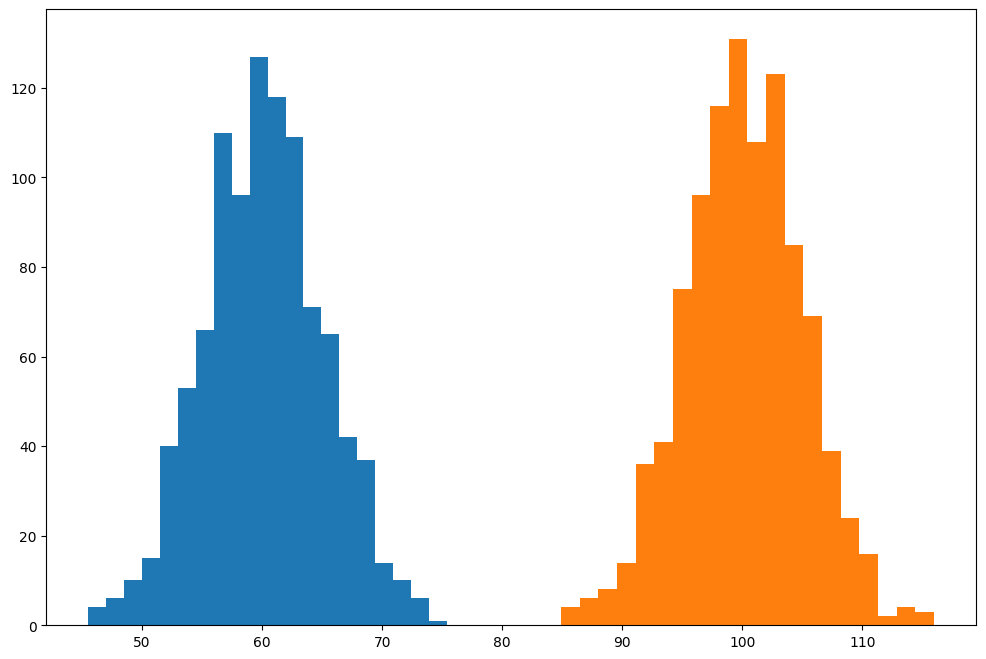

In [6]:
''' We can plot histograms using the following lines'''
n_bins = 20 # histogram parameter
plt.hist(resting_hr, n_bins)
plt.hist(stress_hr, n_bins)

## Now coding some simple functions.

In [7]:
import math
def calculate_mean(np_array):
    tot = 0
    # Or we could use tot = sum(np_array)
    for i in np_array:
        tot += i 
    c = len(np_array)
    ans = tot/c
    return ans

print("Actual mean: 60, Calculated mean: ", calculate_mean(resting_hr))

def calculate_std(np_array, mu):
    tot = 0
    for i in np_array:
        tot += (i - mu) ** 2
    # Or we could simply write - tot = sum((x - mu) ** 2 for x in np_array)
    c = len(np_array)
    ans = (tot/c) ** 0.5   
    return ans

print("Actual std: 5, Calculated std: ", calculate_std(resting_hr, calculate_mean(resting_hr)))

Actual mean: 60, Calculated mean:  60.19057056670355
Actual std: 5, Calculated std:  4.99260634408997


# Testing the Prior Classifier in Classifier.py File

I have implemented the testing as follows

- Is the code usable for more than 2 classes or more than one feature?

  Yes, Because having Prior Classifier basically means that we take the frequency of each class into account and predict the max class. So it is reusable for more than 2 classes. It doesn't depend on the features at all (X values) so it doesn't matter for now.

- What is the fewest amount of parameters we need?

  The fewest amount of parameters in this are the number of classes. if we have n classes then we have n parameters. This is the fewest amount. Because prior classifiers depend on the probability of the classes and the output is always the maximum class.

- Can we retrain the classifier without creating a brand new class instance?

  Yes, we can retain this without creating new class instance because the fit function updates the class_priors or the model_params with the new data classes.

In [8]:
# Dataset
notstress_hr = np.random.normal(65, 5, 570)
stress_hr = np.random.normal(110, 5, 430)

hrD = pd.DataFrame(np.hstack((notstress_hr, stress_hr)), columns=['Heart Rate'])

li = ['Not Stressed' for x in range(570)]
li.extend(['Stressed' for x in range(430)])

hrD['Labels'] = li
display(hrD)

,Heart Rate,Labels
0,61.391312,Not Stressed
1,65.884104,Not Stressed
2,62.266600,Not Stressed
3,63.641724,Not Stressed
4,73.367260,Not Stressed
...,...,...
995,103.070060,Stressed
996,112.527946,Stressed
997,117.445566,Stressed
998,121.357249,Stressed


dict_keys(['Not Stressed', 'Stressed'])

430

Heart Rate                                              \
                  count        mean      std        min         25%   
Labels                                                                
Not Stressed      570.0   65.158355  4.94830  50.044320   61.893409   
Stressed          430.0  109.921561  5.19899  95.465059  106.085675   

                                                  
                     50%         75%         max  
Labels                                            
Not Stressed   64.949102   68.404027   84.631189  
Stressed      110.189417  113.563073  124.342015

Labels
Not Stressed    Axes(0.125,0.11;0.775x0.77)
Stressed        Axes(0.125,0.11;0.775x0.77)
Name: Heart Rate, dtype: object

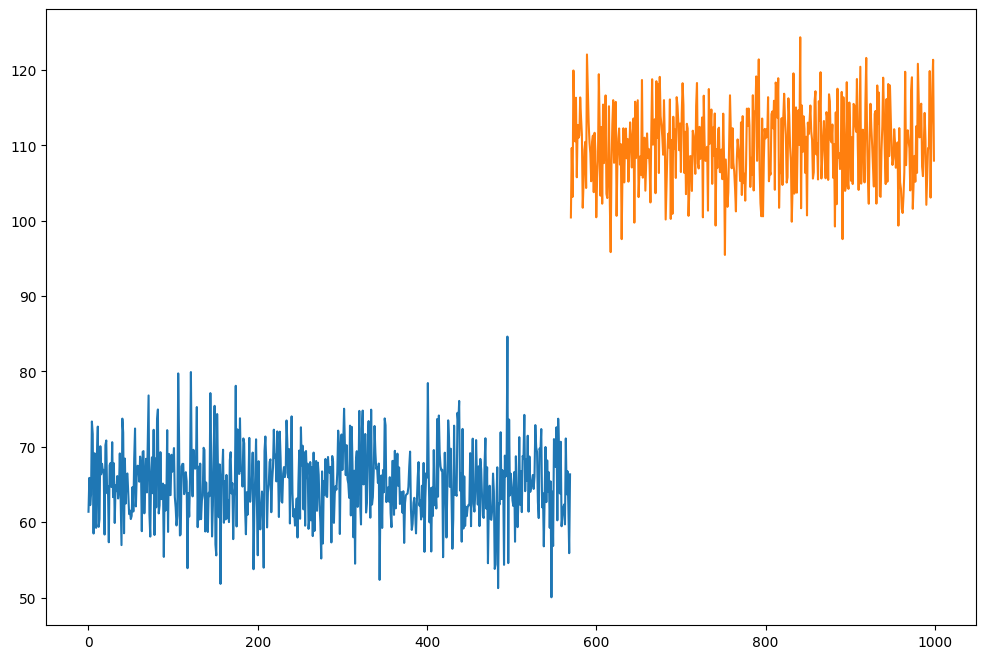

In [9]:
# GroupBy function
display(hrD.groupby('Labels').groups.keys())
display(len(hrD.groupby('Labels').get_group('Stressed')))
display(hrD.groupby('Labels').describe())
hrD.groupby('Labels')['Heart Rate'].plot()

{'Not Stressed': 0.57, 'Stressed': 0.43}

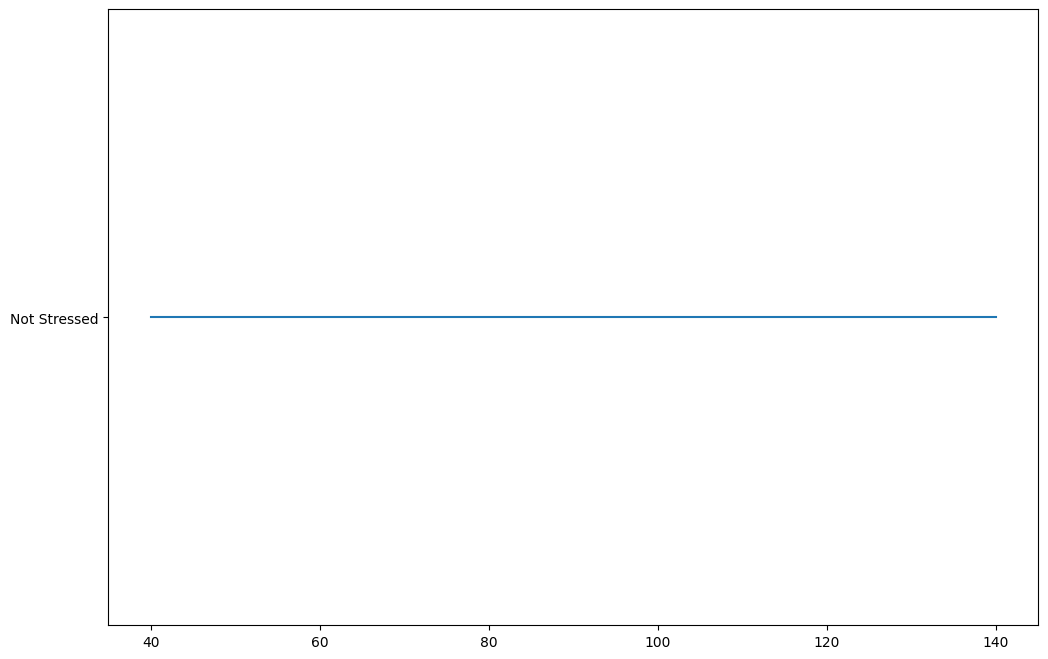

In [10]:
import classifiers
# Training

x = hrD.iloc[:, :-1].values
y = hrD.iloc[:, -1].values

clf = classifiers.Prior()
clf.fit(x, y)
display(clf.model_params)

# Testing

predictions = [clf.predict(i) for i in range(40, 141)]
plt.plot([n for n in range(40, 141)], predictions);

# Calculating Priors for three classes

In [11]:
# Dataset
notstress_hr = np.random.normal(65, 5, 210)
medium_hr = np.random.normal(85, 5, 580)
stress_hr = np.random.normal(110, 5, 430)

Data = pd.DataFrame(np.hstack((medium_hr, stress_hr, notstress_hr)), columns=['Heart Rate'])

li = ['Medium' for x in range(580)]
li.extend(['Stressed' for x in range(430)])
li.extend(['Not Stressed' for x in range(210)])

Data['Labels'] = li
display(Data)

,Heart Rate,Labels
0,85.170137,Medium
1,85.556863,Medium
2,84.104534,Medium
3,86.979099,Medium
4,88.464279,Medium
...,...,...
1215,61.045503,Not Stressed
1216,61.100735,Not Stressed
1217,70.409924,Not Stressed
1218,58.252119,Not Stressed


dict_keys(['Medium', 'Not Stressed', 'Stressed'])

430

Heart Rate                                               \
                  count        mean       std        min         25%   
Labels                                                                 
Medium            580.0   84.765322  4.854906  70.804607   81.531312   
Not Stressed      210.0   65.186830  5.397684  50.352757   61.441571   
Stressed          430.0  109.602782  4.969201  94.961838  106.134979   

                                                  
                     50%         75%         max  
Labels                                            
Medium         84.711661   87.784438  101.215465  
Not Stressed   64.921006   68.802241   77.557783  
Stressed      109.971212  113.285867  120.981116

Labels
Medium          Axes(0.125,0.11;0.775x0.77)
Not Stressed    Axes(0.125,0.11;0.775x0.77)
Stressed        Axes(0.125,0.11;0.775x0.77)
Name: Heart Rate, dtype: object

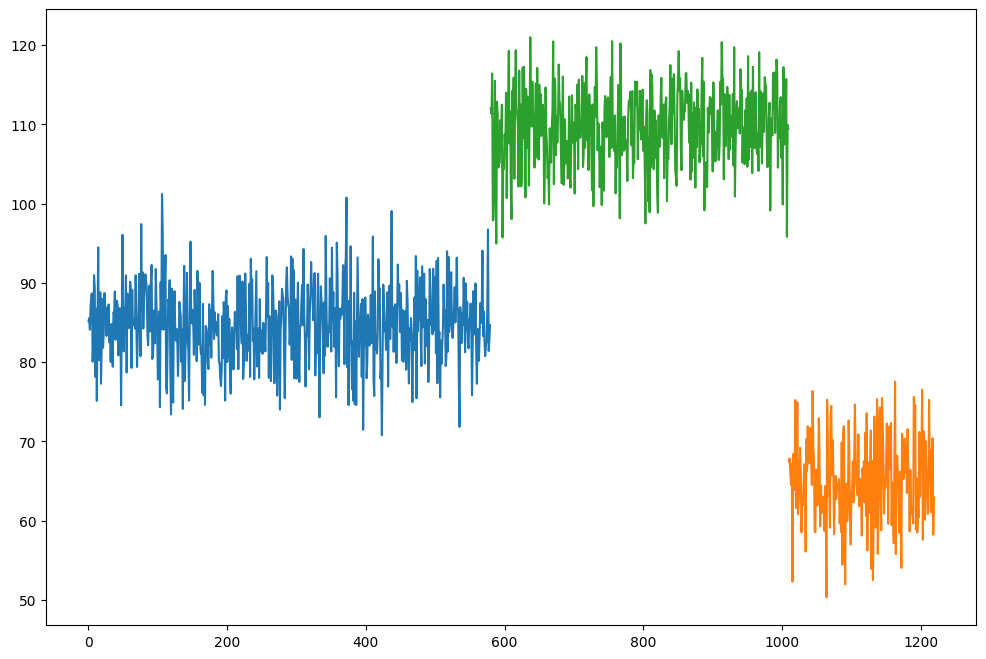

In [12]:
# GroupBy function
display(Data.groupby('Labels').groups.keys())
display(len(Data.groupby('Labels').get_group('Stressed')))
display(Data.groupby('Labels').describe())
Data.groupby('Labels')['Heart Rate'].plot()

{'Medium': 0.47540983606557374,
 'Stressed': 0.3524590163934426,
 'Not Stressed': 0.1721311475409836}

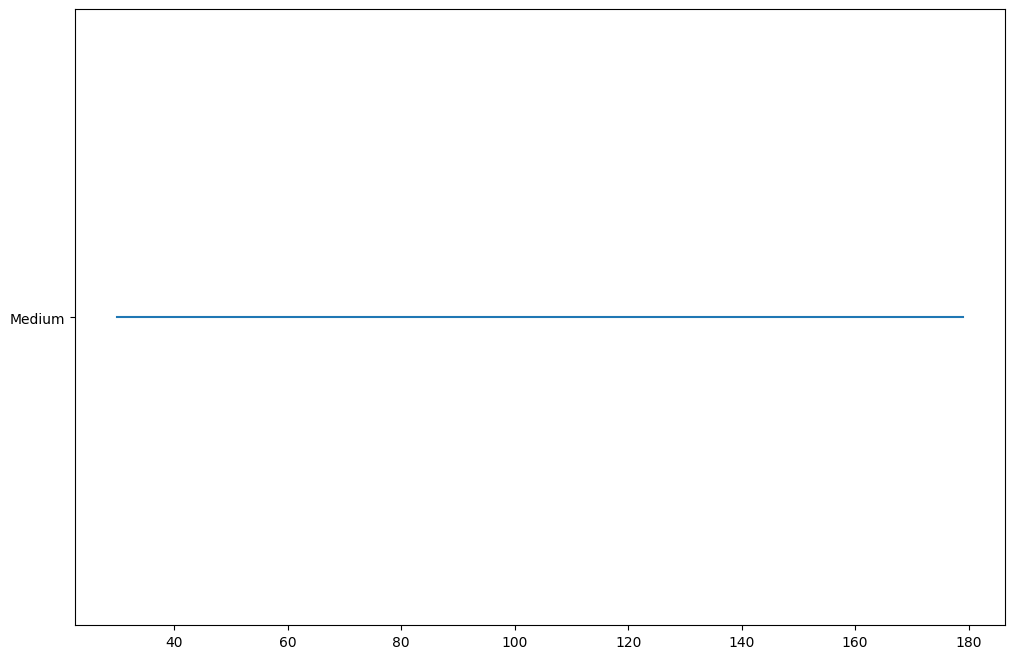

In [13]:
import classifiers
# Training

x = Data.iloc[:, :-1].values
y = Data.iloc[:, -1].values

# Using the same clf as the above
clf.fit(x, y)
display(clf.model_params)

# Testing

predictions = [clf.predict(i) for i in range(30, 180)]
plt.plot([n for n in range(30, 180)], predictions);

# Calculating Priors

In [14]:
'''Create our dataset with labels'''
mu, sigma = 60, 5 # mean and standard deviation
resting_hr = np.random.normal(mu, sigma, 1000)

mu, sigma = 100, 5 # mean and standard deviation
stress_hr = np.random.normal(mu, sigma, 1100)

''' Create a Pandas Dataframe with our X data'''
hrDf = pd.DataFrame(np.hstack((resting_hr, stress_hr)), columns=['Heart Rate'])

''' Create a List with labels for each sample '''
li = ['Not Stressed' for x in range(0,1000)]
li.extend(['Stressed' for x in range(0,1100)]) # .extend is an inplace method that adds each item in a list to a list

''' Create a new column (labels) and set that equal to the list'''
hrDf['Labels'] = li

''' Display our dataset'''
display(hrDf)


,Heart Rate,Labels
0,57.731818,Not Stressed
1,68.631133,Not Stressed
2,55.563353,Not Stressed
3,63.858981,Not Stressed
4,61.781264,Not Stressed
...,...,...
2095,102.304124,Stressed
2096,105.241999,Stressed
2097,99.594664,Stressed
2098,108.722919,Stressed


dict_keys(['Not Stressed', 'Stressed'])

1100

Heart Rate                                                        \
                  count       mean       std        min        25%        50%   
Labels                                                                          
Not Stressed     1000.0  59.901499  4.941905  44.116481  56.711054  59.898352   
Stressed         1100.0  99.778105  5.100346  85.502431  96.255231  99.731791   

                                      
                     75%         max  
Labels                                
Not Stressed   63.261561   75.564551  
Stressed      103.361587  115.491497

Labels
Not Stressed    Axes(0.125,0.11;0.775x0.77)
Stressed        Axes(0.125,0.11;0.775x0.77)
Name: Heart Rate, dtype: object

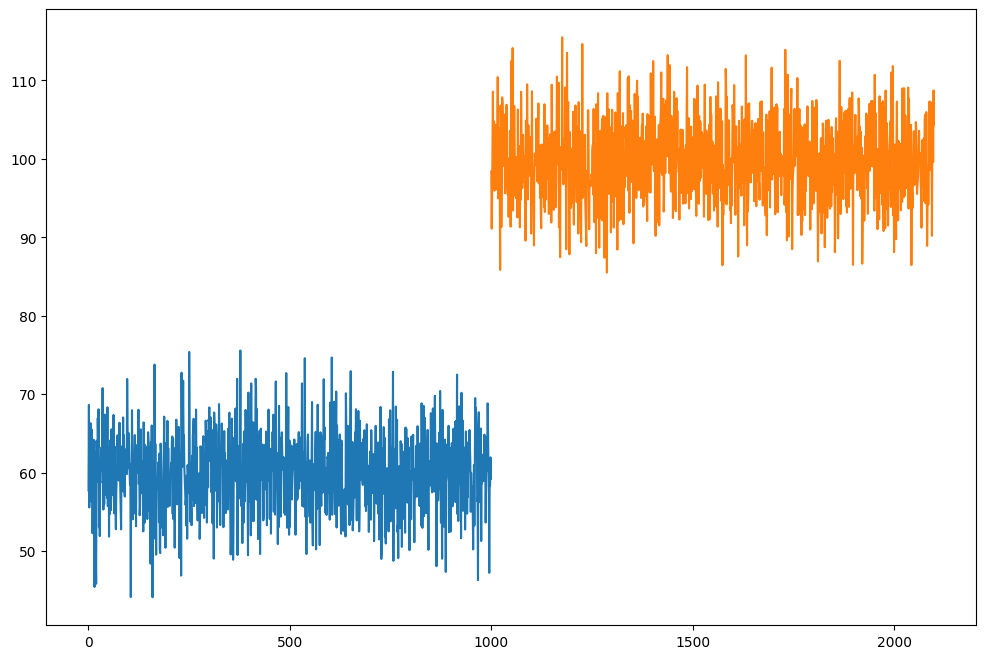

In [15]:
''' Fun dataset operations with groupby '''

''' We can get the dictionary keys for each group'''
display(hrDf.groupby('Labels').groups.keys())

''' We can also get a total count of samples in a group'''
display(len(hrDf.groupby('Labels').get_group('Stressed')))

''' Here are useful statistics'''
display(hrDf.groupby('Labels').describe()) # Ensure that the mean and std match what we put above


''' We can plot dataframes as well'''
hrDf.groupby('Labels')['Heart Rate'].plot()



In [16]:
class Classifier:
    ''' This is a class prototype for any classifier. It contains two empty methods: predict, fit'''
    def __init__(self):
        pass
    
    def predict(self, x):
        '''This method takes in x (numpy array) and returns a prediction y'''
        pass
    
    def fit(self, *data):
        '''This method is used for fitting a model to data: x, y'''
        pass

## Your turn to Code. Please fill in the .fit() method below.

In [17]:
class Priors(Classifier):
    ''' A classifier that uses only priors to determine what to output'''
    def __init__(self):
        self.class_priors = {} # Empty Dictionary that maps Class to Prior {Class1:Prior1, Class2:Prior2, ...}
        
    def predict(self, x):
        '''Always Returns the key corrsponding to the max value of the class_priors'''
        return max(self.class_priors, key=self.class_priors.get)

    
    def fit(self, dataframe, label_key = 'Labels'):
        ''' Calculates class_priors from a dataframe and stores them in self.class_priors.
            Label_Key specifies the column that contains the class labels. These should also be used
            as keys for the dictionary
        '''
        counts = {}
        
        for label in dataframe[label_key]:
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1
        tot = len(dataframe)
        self.class_priors = {l: count / tot for l, count in counts.items()} 
        
        

## Run the following code to test your results
You should get ~0.48 and ~0.52 for your priors

In [18]:
''' Creating the classifier, fit to hrDf and view the priors'''
testclf = Priors()
testclf.fit(hrDf)
display(testclf.class_priors)

{'Not Stressed': 0.47619047619047616, 'Stressed': 0.5238095238095238}

' The plot should have one straight line of just Stressed'

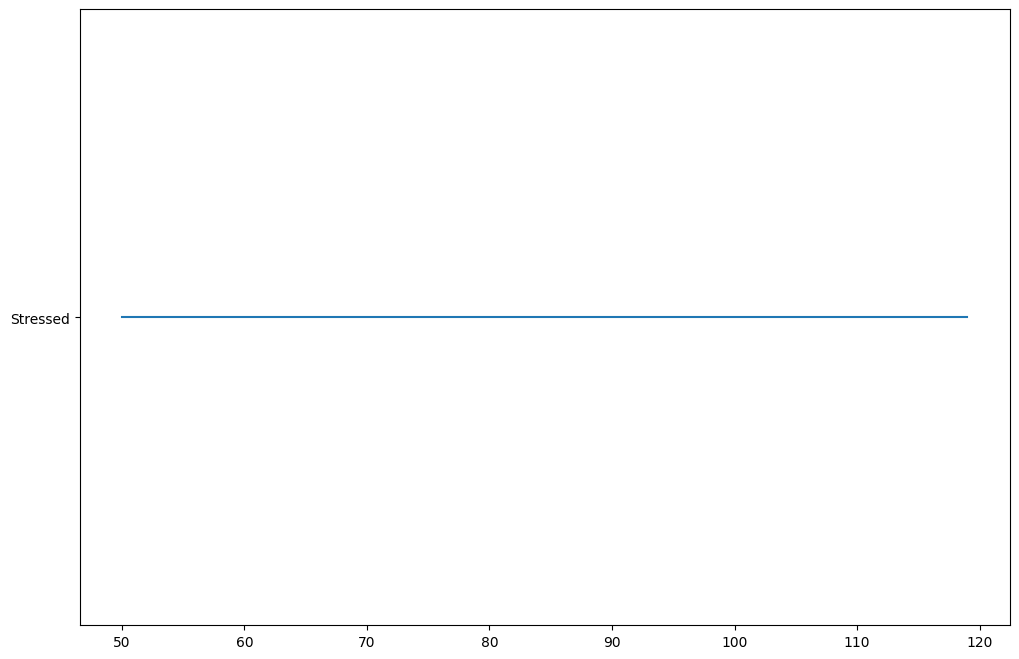

In [19]:
'''Time to plot the predictions'''
predictions = [testclf.predict(x) for x in range(50, 120)]
plt.plot([n for n in range(50,120)], predictions)

''' The plot should have one straight line of just Stressed'''